[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/Random_Forest_Exercise.ipynb)

Implementation of the Random Forst end-to-end

## 1 Problem Introduction

The problem is about predicting the max temperatur for tomorrow in our city using one year of past weather data. This will be a supervised, regression machine learning task. 

## 2 Workflow


1.   State the question and determine required data
2.   Acquire the data in an accessible format
3.   Data Preprocessing
4.   Prepare the data for ML model
5.   Establish a baseline model
6.   Train the model on training data
7.   Make prediction on test data
8.   Calculate performance metrics
9.   Improve the model
10. Visualize the result 



## 3. Data Acquisition

In [2]:
!wget https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/random_forest_explained/data/temps.csv

--2018-06-05 11:57:53--  https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/random_forest_explained/data/temps.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.52.133
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11260 (11K) [text/plain]
Saving to: ‘temps.csv.1’

temps.csv.1         100%[===================>]  11.00K  --.-KB/s    in 0.001s  

2018-06-05 11:57:53 (20.4 MB/s) - ‘temps.csv.1’ saved [11260/11260]



In [3]:
import pandas as pd

features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


year: 2016 for all data samples
month: number of month of the 2016
day: number for day of the year
week: day of week as a chracter string
temp_2: max temperature 2 days prior
temp_1: max temperature 1 day prior
average: historical average max temperature
actual: max temperature measurement
friend: prediction from friends

## 4. Data Preprocessing

In [4]:
print("The shape of features is:", features.shape)

The shape of features is: (348, 9)


In [5]:
# to identity anomalies we can quickly compute summary statistics
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [0]:
# Use datetime for dealing with dates
import datetime

years = features['year']
months = features['month']
days = features['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Text(0.5,1,'Friend Estimation')

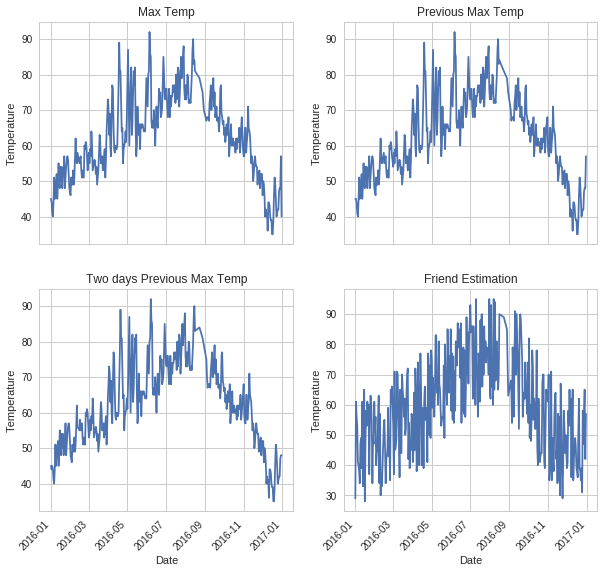

In [12]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))
fig.autofmt_xdate(rotation=45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature')
ax1.set_title('Max Temp')

# Temperature 1 day previous
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature')
ax2.set_title('Previous Max Temp')


# Temperature 2 days previous
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature')
ax3.set_title('Two days Previous Max Temp')


# Temperature 1 day previous
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature')
ax4.set_title('Friend Estimation')

In [13]:
# one-hot encoding
features = pd.get_dummies(features)

features.iloc[:,5:].head()

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [14]:
print("The shape of features is:", features.shape)

The shape of features is: (348, 15)


In [0]:
# Features and Targets convert to Arrays
import numpy as np

labels = np.array(features['actual'])

features = features.drop('actual',axis=1)

feature_list = list(features.columns)

features = np.array(features)

In [0]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=.25, random_state=42)

In [20]:
print('Training Features Shape',train_features.shape)
print('Training Labels Shape',train_labels.shape)
print('Testing Features Shape', test_features.shape)
print('Tesing Labels Shape',test_labels.shape)

Training Features Shape (261, 14)
Training Labels Shape (261,)
Testing Features Shape (87, 14)
Tesing Labels Shape (87,)


## 5. Build the model

In [22]:
# The baseline predictoins are the historical average
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error:',round(np.mean(baseline_errors),2))

Average baseline error: 5.06


In [24]:
# Train Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
# Make prediction on test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

print('Mean Absolute Error:',round(np.mean(errors),2), 'degrees:')

Mean Absolute Error: 3.83 degrees:


In [26]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:',round(accuracy,2),'%.')

Accuracy: 93.99 %.


## 6. Visulizing a Single Decision Tree

In [28]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Selecting previously unselected package fontconfig.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libxt6:amd64 (1:1.1.5-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up libcairo2:amd64 (1.14.10-1ubuntu1) ...
Setting up libgvpr2 (2.38.0-16ubuntu2) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libthai0:amd64 (0.1.26-3) ...
Setting up libxmu6:amd64 (2:1.1.2-2) ...
Setting up libpango-1.0-0:amd64 (1.40.12-1) ...
Setting up libxaw7:amd64 (2:1.0.13-1) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Setting up libgvc6 (2.38.0-16ub

In [0]:
from sklearn.tree import export_graphviz
import pydot

In [0]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

export_graphviz(tree, out_file='tree.dot',feature_names=feature_list, rounded=True,precision=1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

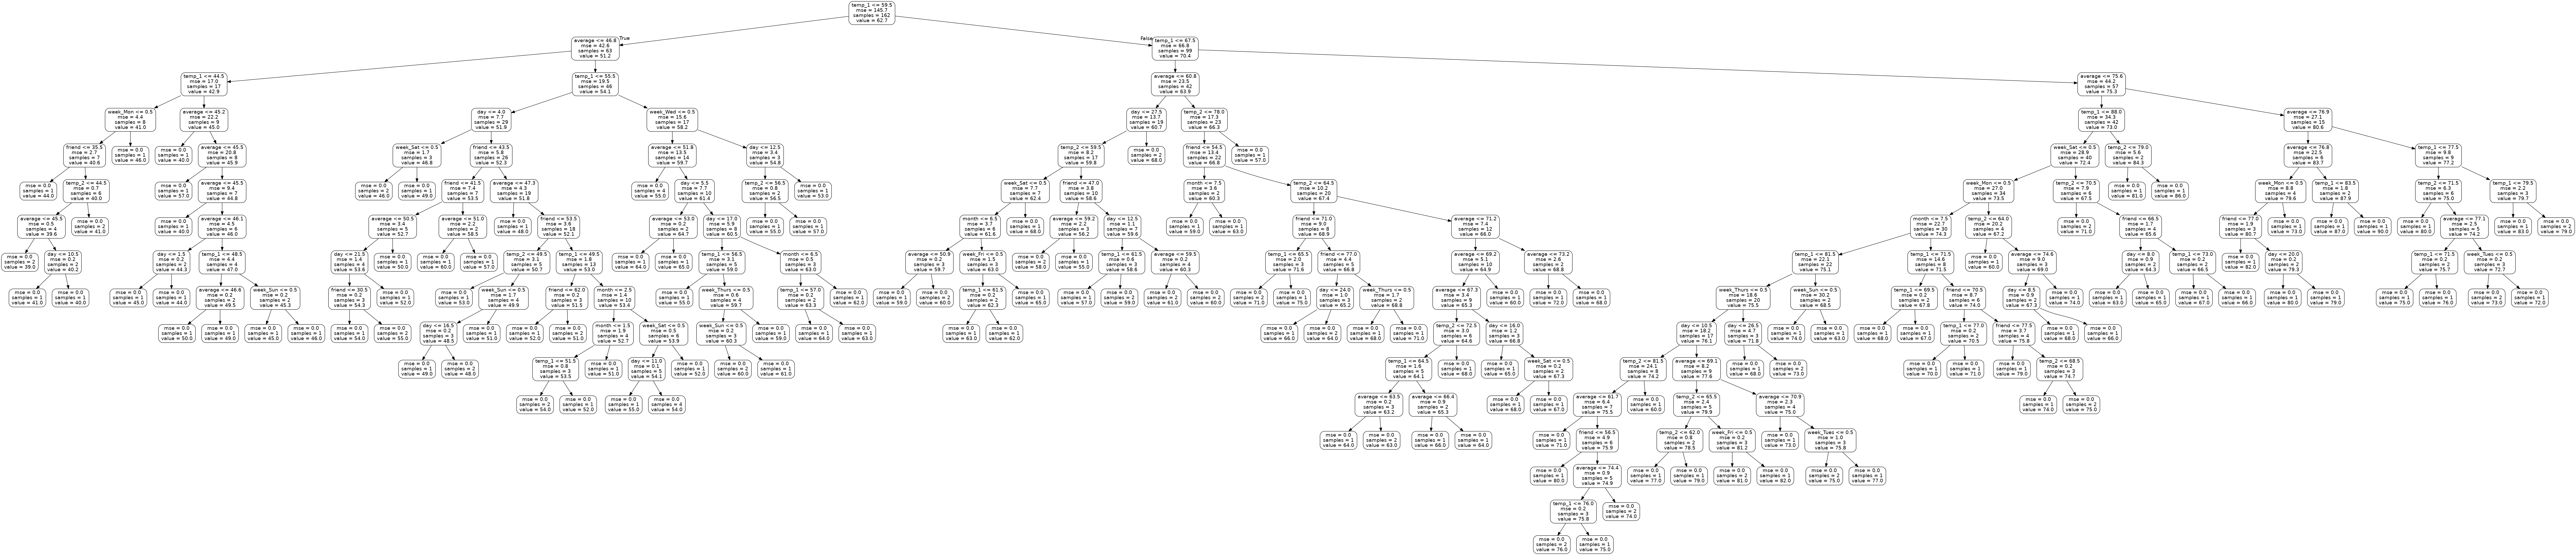

In [34]:
from IPython.display import Image
Image('tree.png')

## 7. Variable Importance

In [37]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importances
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: temp_1               Importance: 0.7
Variable: average              Importance: 0.19
Variable: day                  Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
# New random forest only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)

important_indices = [feature_list.index('temp_1'),
                    feature_list.index('average')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:',round(np.mean(errors), 2), 'degree.')

mape = np.mean(100*(errors / test_labels))
accuracy = 100 - mape

print('Accuracy:' ,round(accuracy,2),'%.')


Mean Absolute Error: 3.9 degree.
Accuracy: 93.8 %.


Text(0.5,1,'Variable Importances')

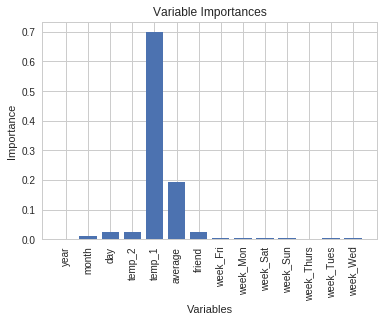

In [41]:
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation='vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance')
plt.xlabel('Variables')
plt.title('Variable Importances')

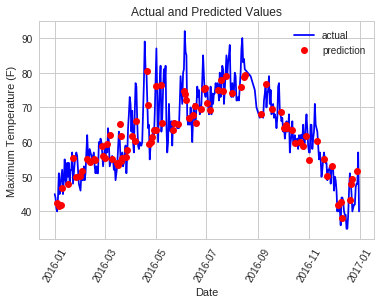

In [42]:
import datetime

months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data={'date':dates, 'actual':labels})

months = test_features[:,feature_list.index('month')]
days = test_features[:,feature_list.index('day')]
years = test_features[:,feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');